In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
df = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])


In [2]:
df.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


In [3]:
df.tail()

,longitude,latitude,median_house_value
20635,-121.09,39.48,78100.0
20636,-121.21,39.49,77100.0
20637,-121.22,39.43,92300.0
20638,-121.32,39.43,84700.0
20639,-121.24,39.37,89400.0


In [4]:
df.describe()

,longitude,latitude,median_house_value
count,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,206855.816909
std,2.003532,2.135952,115395.615874
min,-124.350000,32.540000,14999.000000
25%,-121.800000,33.930000,119600.000000
50%,-118.490000,34.260000,179700.000000
75%,-118.010000,37.710000,264725.000000
max,-114.310000,41.950000,500001.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   median_house_value  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [6]:
df.isnull()

,longitude,latitude,median_house_value
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
20635,False,False,False
20636,False,False,False
20637,False,False,False
20638,False,False,False


In [7]:
df.isnull().sum()

longitude             0
latitude              0
median_house_value    0
dtype: int64

In [8]:
df.loc[474]

longitude               -122.28
latitude                  37.86
median_house_value    169900.00
Name: 474, dtype: float64

<Axes: xlabel='longitude', ylabel='latitude'>

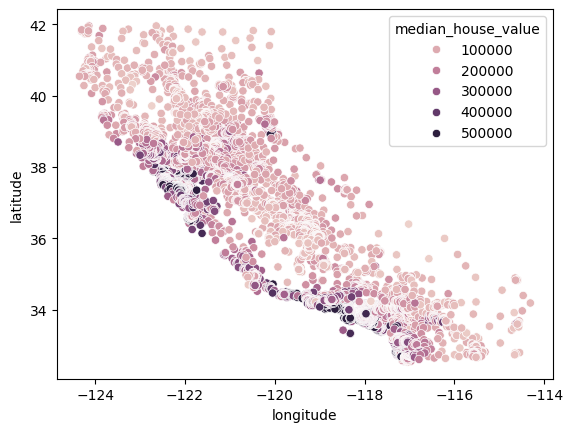

In [9]:


sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'median_house_value')

In [10]:


X_train, X_test, y_train, y_test = train_test_split(df[['latitude', 'longitude']], df[['median_house_value']], test_size=0.33, random_state=0)

In [11]:


X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_train_norm)


/home/exam/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

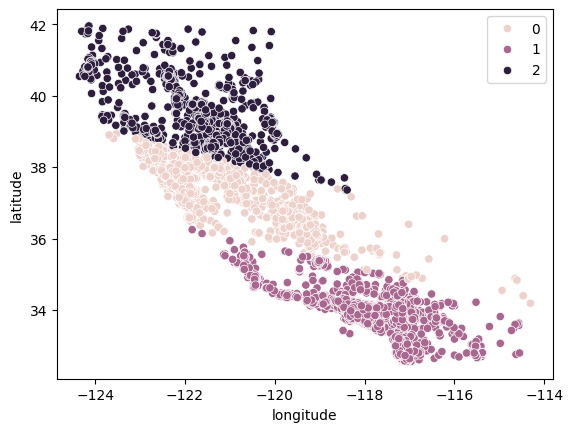

In [13]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

<Axes: ylabel='median_house_value'>

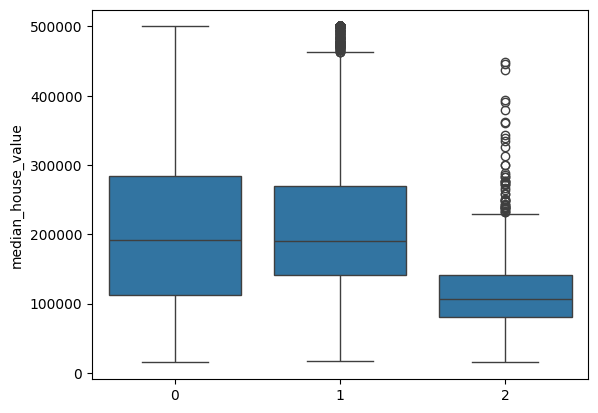

In [14]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

In [15]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7499956340585485

In [16]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0).fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

/home/exam/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/exam/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/exam/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/exam/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

<Axes: xlabel='longitude', ylabel='latitude'>

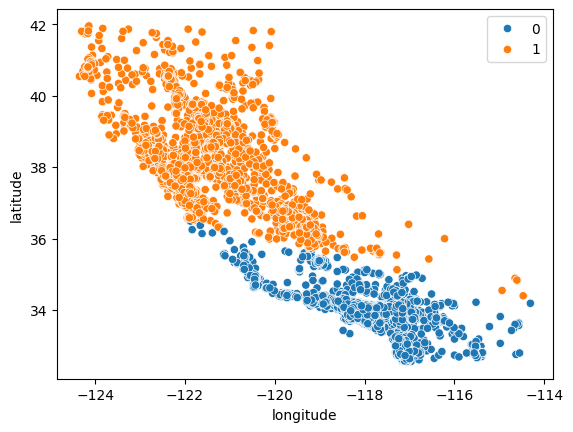

In [17]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

<Axes: >

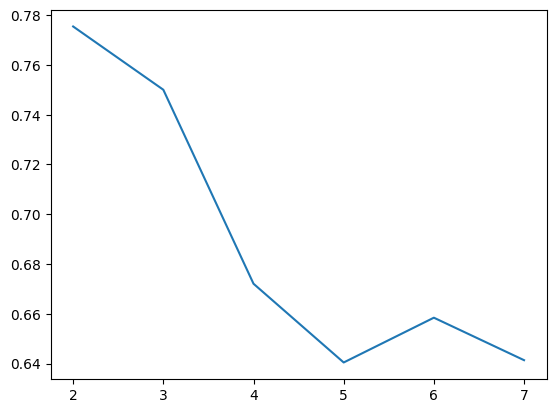

In [18]:
sns.lineplot(x = K, y = score)

<Axes: ylabel='median_house_value'>

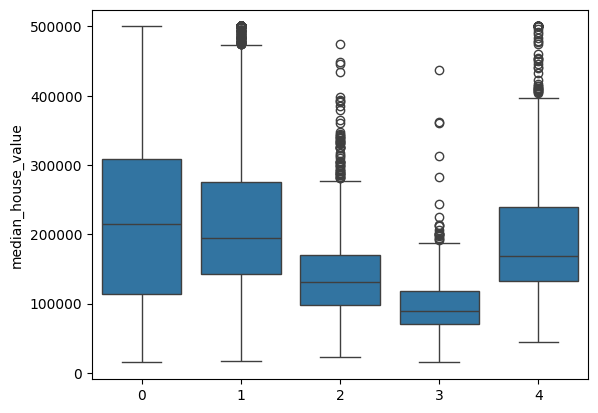

In [19]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])